In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
#basic cnn
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/ADMIN/Desktop/Hoc/This semester/IoT/Plant-Leaf-Disease-Prediction/Dataset/train', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 6, class_mode = 'categorical')
valid_set = test_datagen.flow_from_directory('C:/Users/ADMIN/Desktop/Hoc/This semester/IoT/Plant-Leaf-Disease-Prediction/Dataset/val', # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 3, class_mode = 'categorical')

labels = (training_set.class_indices)
print(labels)

Found 15750 images belonging to 10 classes.
Found 3085 images belonging to 10 classes.
{'Tomato - Bacterial_spot': 0, 'Tomato - Early_blight': 1, 'Tomato - Healthy': 2, 'Tomato - Late_blight': 3, 'Tomato - Leaf_Mold': 4, 'Tomato - Septoria_leaf_spot': 5, 'Tomato - Target_Spot': 6, 'Tomato - Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato - Tomato_mosaic_virus': 8, 'Tomato - Two-spotted_spider_mite': 9}


In [19]:
history=classifier.fit_generator(training_set,
                            steps_per_epoch = 20,
                            epochs = 150,
                            validation_data=valid_set
                        )

classifier_json=classifier.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    classifier.save_weights("my_model_weights.h5")
    classifier.save("model.h5")
    print("Saved model to disk")

Epoch 1/150
 3/20 [===>..........................] - ETA: 0s - batch: 1.0000 - size: 6.0000 - loss: 1.8993 - accuracy: 0.2778    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11660\642805400.py:1: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(training_set,


20/20 [==============================] - 5s 261ms/step - batch: 9.5000 - size: 6.0000 - loss: 1.6188 - accuracy: 0.4083 - val_loss: 1.5244 - val_accuracy: 0.4943
Epoch 2/150
20/20 [==============================] - 5s 250ms/step - batch: 9.5000 - size: 6.0000 - loss: 1.5532 - accuracy: 0.4333 - val_loss: 1.4594 - val_accuracy: 0.5018
Epoch 3/150
20/20 [==============================] - 5s 247ms/step - batch: 9.5000 - size: 6.0000 - loss: 1.5930 - accuracy: 0.4750 - val_loss: 1.4350 - val_accuracy: 0.5397
Epoch 4/150
20/20 [==============================] - 5s 247ms/step - batch: 9.5000 - size: 6.0000 - loss: 1.5837 - accuracy: 0.4250 - val_loss: 1.7659 - val_accuracy: 0.4548
Epoch 5/150
20/20 [==============================] - 5s 264ms/step - batch: 9.5000 - size: 6.0000 - loss: 1.5503 - accuracy: 0.5000 - val_loss: 1.5358 - val_accuracy: 0.5420
Epoch 6/150
20/20 [==============================] - 5s 271ms/step - batch: 9.5000 - size: 6.0000 - loss: 1.4478 - accuracy: 0.5500 - val_loss

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


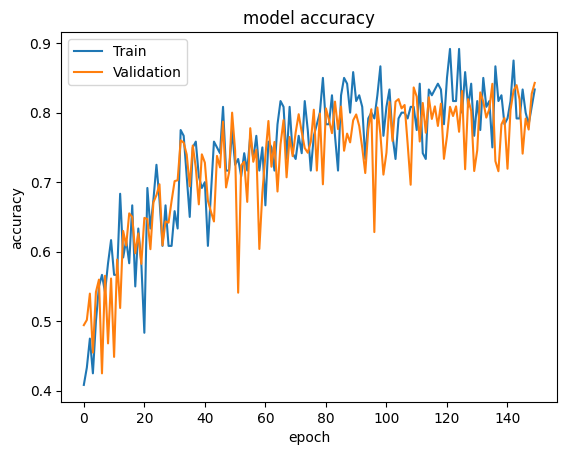

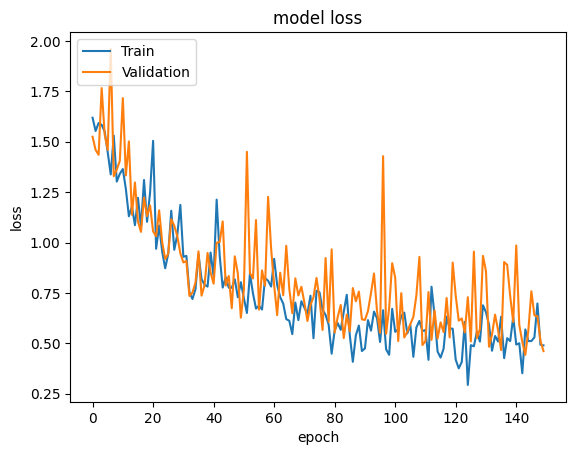

In [20]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()